학번: 20183911

이름: 김수현

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets

np.random.seed(5)

## Dataset
- Scikit learn에서 제공하는 iris dataset을 활용합니다
- 150개 sample과 4개의 feature로 이루어져있습니다
- y class는 총 3개로 구성되어 있는 dataset입니다 (class정보는 본 실습에서 활용하지 않습니다)

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target


## Normalize the data

In [3]:
X = X-np.mean(X, axis=0)   # 각 샘플에서 평균을 뺀 값

In [4]:
X.shape

(150, 4)

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Problem 1: PCA 

- `pca(X, k)`
    - input: data matrix `X` 
    - input: number of components `k`
    
    - output: $U_r$, i.e., matrix with `k` basis (column) vectors 

In [6]:
def pca(X, k):
    cov = np.matmul(X.T, X)/X.shape[0]
    U, S, V = np.linalg.svd(cov)
    return U[:,:k]

## Problem 2: Dimension reduction

- Dataset `X`를 `k=3` 차원으로 차원 축소를 수행하세요
- `pca`를 수행하여 `U` 행렬을 찾고
- `Z`에 3차원으로 축소된 dataset을 저장하세요


In [7]:
# 답 작성
Ur = pca(X, 3)
Z = np.matmul(X, Ur)

### 결과 plot

Text(0.5, 0, 'Eigenvec 3')

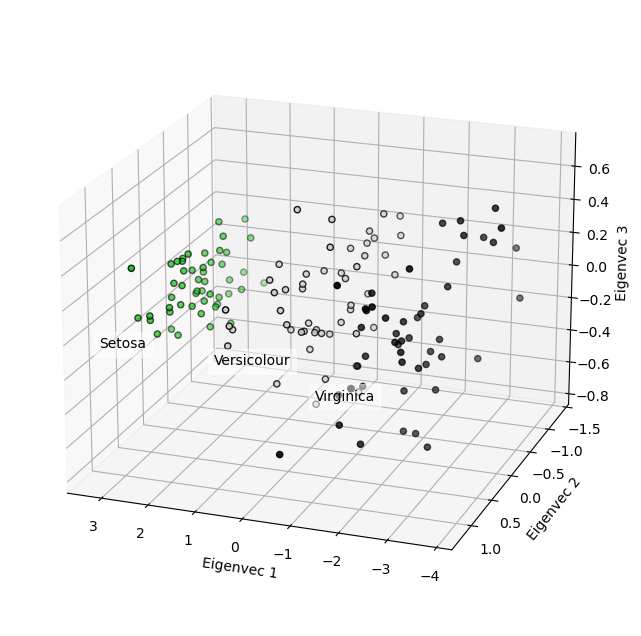

In [8]:
fig = plt.figure(1, figsize=(8, 8))
plt.clf()
ax = fig.add_subplot(projection='3d',elev=20, azim=110)
plt.cla()
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(Z[y == label, 0].mean(),
              Z[y == label, 1].mean() + 1.5,
              Z[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y.astype(int), [1, 2, 0]).astype(float)
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.set_xlabel('Eigenvec 1')
ax.set_ylabel('Eigenvec 2')
ax.set_zlabel('Eigenvec 3')